##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to the TensorFlow Models NLP library

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tfmodels/nlp"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/models/blob/master/docs/nlp/index.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/models/blob/master/docs/nlp/index.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/models/docs/nlp/index.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Learning objectives

In this Colab notebook, you will learn how to build transformer-based models for common NLP tasks including pretraining, span labelling and classification using the building blocks from [NLP modeling library](https://github.com/tensorflow/models/tree/master/official/nlp/modeling).

## Install and import

### Install the TensorFlow Model Garden pip package

*  `tf-models-official` is the stable Model Garden package. Note that it may not include the latest changes in the `tensorflow_models` github repo. To include latest changes, you may install `tf-models-nightly`,
which is the nightly Model Garden package created daily automatically.
*  `pip` will install all models and dependencies automatically.

In [2]:
!pip install tf-models-official

  Using cached tf_models_official-2.14.2-py2.py3-none-any.whl.metadata (1.4 kB)


  Using cached Cython-3.0.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)


  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


  Using cached google_api_python_client-2.103.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Using cached immutabledict-3.0.0-py3-none-any.whl.metadata (3.1 kB)


  Using cached kaggle-1.5.16-py3-none-any.whl


  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)


  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)


  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)


  Using cached pycocotools-2.0.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached sacrebleu-2.3.1-py3-none-any.whl (118 kB)


  Using cached sentencepiece-0.1.99-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached seqeval-1.2.2-py3-none-any.whl


  Using cached tensorflow_model_optimization-0.7.5-py2.py3-none-any.whl.metadata (914 bytes)


  Using cached tensorflow_text-2.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)


  Using cached httplib2-0.22.0-py3-none-any.whl (96 kB)


  Using cached google_auth_httplib2-0.1.1-py2.py3-none-any.whl.metadata (2.1 kB)


  Using cached google_api_core-2.12.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)


  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)


  Using cached portalocker-2.8.2-py3-none-any.whl.metadata (8.5 kB)


  Using cached regex-2023.10.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)


  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)


  Using cached lxml-4.9.3-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (3.8 kB)


  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


Using cached tf_models_official-2.14.2-py2.py3-none-any.whl (2.7 MB)
Using cached google_api_python_client-2.103.0-py2.py3-none-any.whl (12.6 MB)


Using cached tensorflow_model_optimization-0.7.5-py2.py3-none-any.whl (241 kB)
Using cached tensorflow_text-2.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
Using cached Cython-3.0.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Using cached immutabledict-3.0.0-py3-none-any.whl (4.0 kB)
Using cached opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)


Using cached pycocotools-2.0.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
Using cached google_api_core-2.12.0-py3-none-any.whl (121 kB)
Using cached google_auth_httplib2-0.1.1-py2.py3-none-any.whl (9.3 kB)
Using cached lxml-4.9.3-cp39-cp39-manylinux_2_28_x86_64.whl (8.0 MB)


Using cached portalocker-2.8.2-py3-none-any.whl (17 kB)
Using cached regex-2023.10.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (773 kB)


### Import Tensorflow and other libraries

In [3]:
import numpy as np
import tensorflow as tf

from tensorflow_models import nlp

2023-10-17 12:23:04.557393: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 12:23:04.557445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 12:23:04.557482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## BERT pretraining model

BERT ([Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)) introduced the method of pre-training language representations on a large text corpus and then using that model for downstream NLP tasks.

In this section, we will learn how to build a model to pretrain BERT on the masked language modeling task and next sentence prediction task. For simplicity, we only show the minimum example and use dummy data.

### Build a `BertPretrainer` model wrapping `BertEncoder`

The `nlp.networks.BertEncoder` class implements the Transformer-based encoder as described in [BERT paper](https://arxiv.org/abs/1810.04805). It includes the embedding lookups and transformer layers (`nlp.layers.TransformerEncoderBlock`), but not the masked language model or classification task networks.

The `nlp.models.BertPretrainer` class allows a user to pass in a transformer stack, and instantiates the masked language model and classification networks that are used to create the training objectives.

In [4]:
# Build a small transformer network.
vocab_size = 100
network = nlp.networks.BertEncoder(
    vocab_size=vocab_size, 
    # The number of TransformerEncoderBlock layers
    num_layers=3)

2023-10-17 12:23:09.241708: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Inspecting the encoder, we see it contains few embedding layers, stacked `nlp.layers.TransformerEncoderBlock` layers and are connected to three input layers:

`input_word_ids`, `input_type_ids` and `input_mask`.


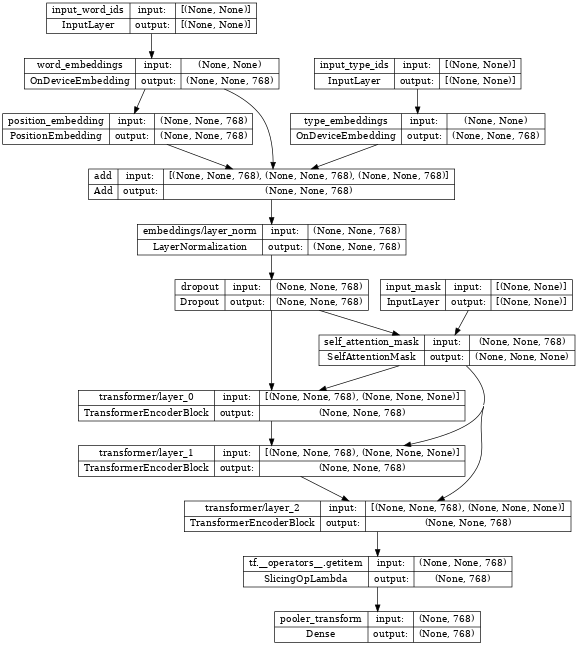

In [5]:
tf.keras.utils.plot_model(network, show_shapes=True, expand_nested=True, dpi=48)

In [6]:
# Create a BERT pretrainer with the created network.
num_token_predictions = 8
bert_pretrainer = nlp.models.BertPretrainer(
    network, num_classes=2, num_token_predictions=num_token_predictions, output='predictions')

Instructions for updating:
Classification as a network is deprecated. Please use the layers.ClassificationHead instead.


Inspecting the `bert_pretrainer`, we see it wraps the `encoder` with additional `MaskedLM` and `nlp.layers.ClassificationHead` heads.

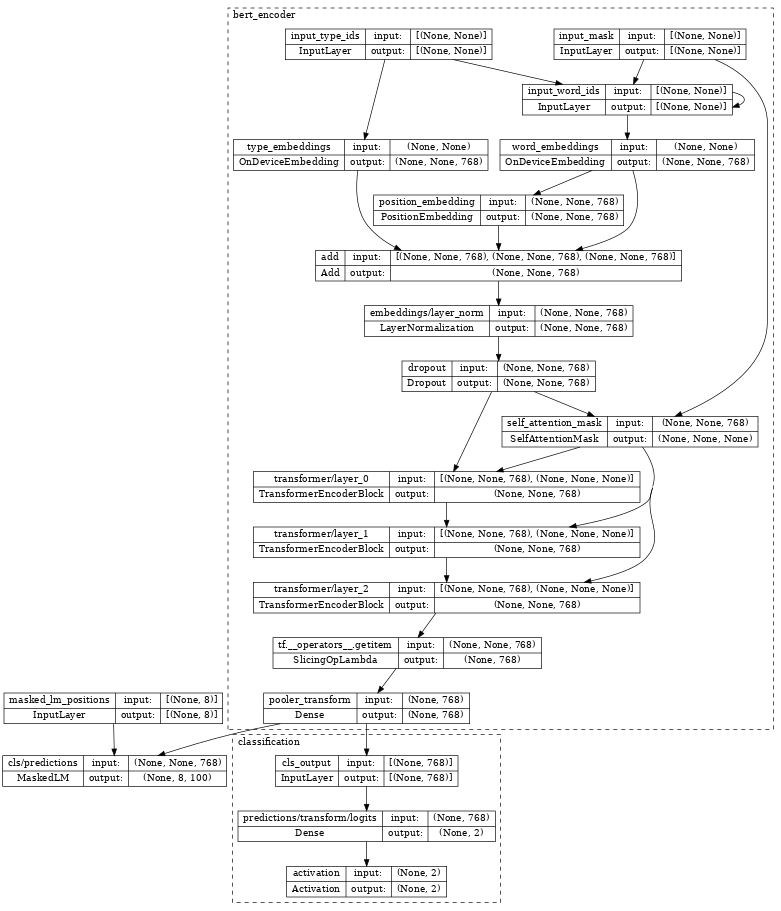

In [7]:
tf.keras.utils.plot_model(bert_pretrainer, show_shapes=True, expand_nested=True, dpi=48)

In [8]:
# We can feed some dummy data to get masked language model and sentence output.
sequence_length = 16
batch_size = 2

word_id_data = np.random.randint(vocab_size, size=(batch_size, sequence_length))
mask_data = np.random.randint(2, size=(batch_size, sequence_length))
type_id_data = np.random.randint(2, size=(batch_size, sequence_length))
masked_lm_positions_data = np.random.randint(2, size=(batch_size, num_token_predictions))

outputs = bert_pretrainer(
    [word_id_data, mask_data, type_id_data, masked_lm_positions_data])
lm_output = outputs["masked_lm"]
sentence_output = outputs["classification"]
print(f'lm_output: shape={lm_output.shape}, dtype={lm_output.dtype!r}')
print(f'sentence_output: shape={sentence_output.shape}, dtype={sentence_output.dtype!r}')

lm_output: shape=(2, 8, 100), dtype=tf.float32
sentence_output: shape=(2, 2), dtype=tf.float32


### Compute loss
Next, we can use `lm_output` and `sentence_output` to compute `loss`.

In [9]:
masked_lm_ids_data = np.random.randint(vocab_size, size=(batch_size, num_token_predictions))
masked_lm_weights_data = np.random.randint(2, size=(batch_size, num_token_predictions))
next_sentence_labels_data = np.random.randint(2, size=(batch_size))

mlm_loss = nlp.losses.weighted_sparse_categorical_crossentropy_loss(
    labels=masked_lm_ids_data,
    predictions=lm_output,
    weights=masked_lm_weights_data)
sentence_loss = nlp.losses.weighted_sparse_categorical_crossentropy_loss(
    labels=next_sentence_labels_data,
    predictions=sentence_output)
loss = mlm_loss + sentence_loss

print(loss)

tf.Tensor(5.2983174, shape=(), dtype=float32)


With the loss, you can optimize the model.
After training, we can save the weights of TransformerEncoder for the downstream fine-tuning tasks. Please see [run_pretraining.py](https://github.com/tensorflow/models/blob/master/official/legacy/bert/run_pretraining.py) for the full example.


## Span labeling model

Span labeling is the task to assign labels to a span of the text, for example, label a span of text as the answer of a given question.

In this section, we will learn how to build a span labeling model. Again, we use dummy data for simplicity.

### Build a BertSpanLabeler wrapping BertEncoder

The `nlp.models.BertSpanLabeler` class implements a simple single-span start-end predictor (that is, a model that predicts two values: a start token index and an end token index), suitable for SQuAD-style tasks.

Note that `nlp.models.BertSpanLabeler` wraps a `nlp.networks.BertEncoder`, the weights of which can be restored from the above pretraining model.


In [10]:
network = nlp.networks.BertEncoder(
        vocab_size=vocab_size, num_layers=2)

# Create a BERT trainer with the created network.
bert_span_labeler = nlp.models.BertSpanLabeler(network)

Inspecting the `bert_span_labeler`, we see it wraps the encoder with additional `SpanLabeling` that outputs `start_position` and `end_position`.

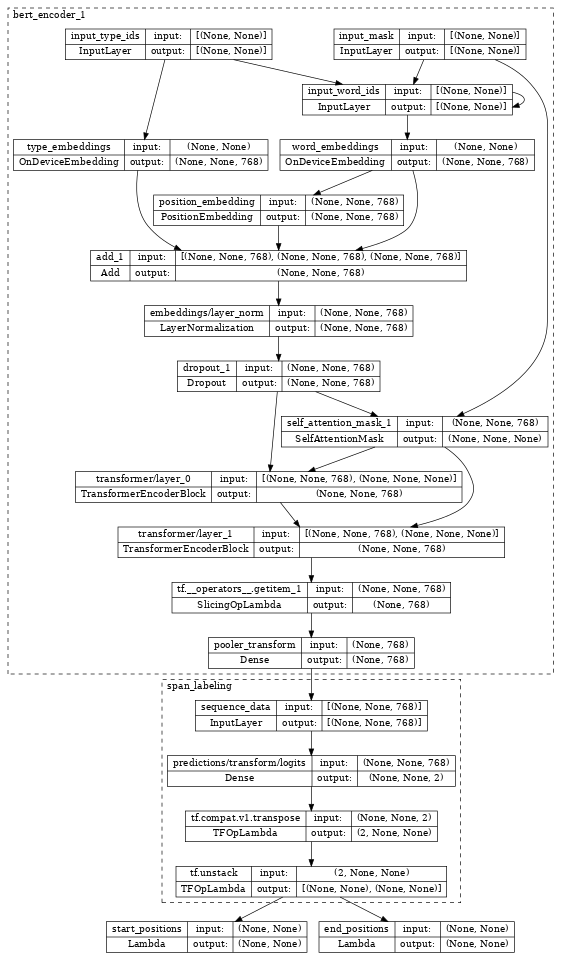

In [11]:
tf.keras.utils.plot_model(bert_span_labeler, show_shapes=True, expand_nested=True, dpi=48)

In [12]:
# Create a set of 2-dimensional data tensors to feed into the model.
word_id_data = np.random.randint(vocab_size, size=(batch_size, sequence_length))
mask_data = np.random.randint(2, size=(batch_size, sequence_length))
type_id_data = np.random.randint(2, size=(batch_size, sequence_length))

# Feed the data to the model.
start_logits, end_logits = bert_span_labeler([word_id_data, mask_data, type_id_data])

print(f'start_logits: shape={start_logits.shape}, dtype={start_logits.dtype!r}')
print(f'end_logits: shape={end_logits.shape}, dtype={end_logits.dtype!r}')

start_logits: shape=(2, 16), dtype=tf.float32
end_logits: shape=(2, 16), dtype=tf.float32


### Compute loss
With `start_logits` and `end_logits`, we can compute loss:

In [13]:
start_positions = np.random.randint(sequence_length, size=(batch_size))
end_positions = np.random.randint(sequence_length, size=(batch_size))

start_loss = tf.keras.losses.sparse_categorical_crossentropy(
    start_positions, start_logits, from_logits=True)
end_loss = tf.keras.losses.sparse_categorical_crossentropy(
    end_positions, end_logits, from_logits=True)

total_loss = (tf.reduce_mean(start_loss) + tf.reduce_mean(end_loss)) / 2
print(total_loss)

tf.Tensor(5.3621416, shape=(), dtype=float32)


With the `loss`, you can optimize the model. Please see [run_squad.py](https://github.com/tensorflow/models/blob/master/official/legacy/bert/run_squad.py) for the full example.

## Classification model

In the last section, we show how to build a text classification model.


### Build a BertClassifier model wrapping BertEncoder

`nlp.models.BertClassifier` implements a [CLS] token classification model containing a single classification head.

In [14]:
network = nlp.networks.BertEncoder(
        vocab_size=vocab_size, num_layers=2)

# Create a BERT trainer with the created network.
num_classes = 2
bert_classifier = nlp.models.BertClassifier(
    network, num_classes=num_classes)

Inspecting the `bert_classifier`, we see it wraps the `encoder` with additional `Classification` head.

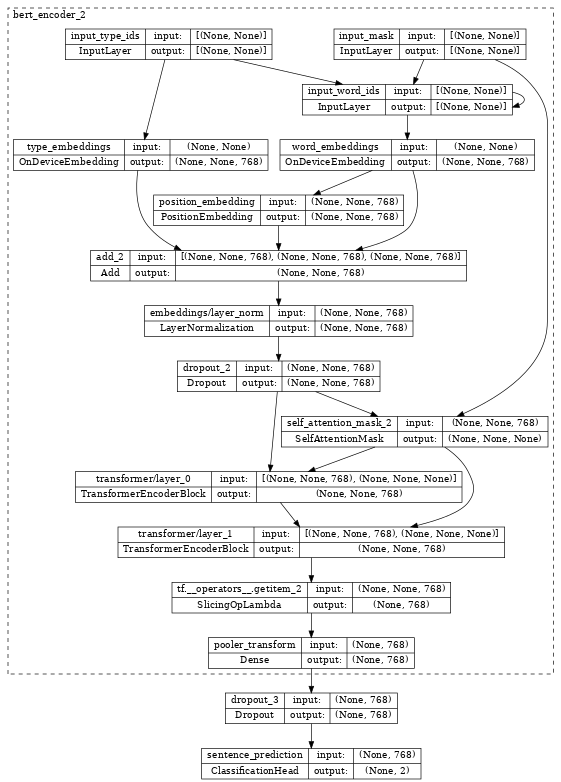

In [15]:
tf.keras.utils.plot_model(bert_classifier, show_shapes=True, expand_nested=True, dpi=48)

In [16]:
# Create a set of 2-dimensional data tensors to feed into the model.
word_id_data = np.random.randint(vocab_size, size=(batch_size, sequence_length))
mask_data = np.random.randint(2, size=(batch_size, sequence_length))
type_id_data = np.random.randint(2, size=(batch_size, sequence_length))

# Feed the data to the model.
logits = bert_classifier([word_id_data, mask_data, type_id_data])
print(f'logits: shape={logits.shape}, dtype={logits.dtype!r}')

logits: shape=(2, 2), dtype=tf.float32


### Compute loss

With `logits`, we can compute `loss`:

In [17]:
labels = np.random.randint(num_classes, size=(batch_size))

loss = tf.keras.losses.sparse_categorical_crossentropy(
    labels, logits, from_logits=True)
print(loss)

tf.Tensor([0.7332015 1.3447659], shape=(2,), dtype=float32)


With the `loss`, you can optimize the model. Please see the [Fine tune_bert](https://www.tensorflow.org/text/tutorials/fine_tune_bert) notebook or the [model training documentation](https://github.com/tensorflow/models/blob/master/official/nlp/docs/train.md) for the full example.